In [2]:
import pandas as pd

# Try reading the CSV files with a different encoding
april_data = pd.read_csv('april_2024.csv', encoding='latin1')
may_data = pd.read_csv('may_2024.csv', encoding='latin1')
june_data = pd.read_csv('june_2024.csv', encoding='latin1')
august_data = pd.read_csv('august_2024.csv', encoding='latin1')
september_data = pd.read_csv('september_2024.csv', encoding='latin1')
october_data = pd.read_csv('october_2024.csv', encoding='latin1')

# Combine all months into one DataFrame
all_data = pd.concat([april_data, may_data, june_data, august_data, september_data], ignore_index=True)

# Check the structure of the combined data
print(all_data.head())

   Order #            Sent Date     Modifier     Option Group Name  \
0       18  2024-04-13 11:34:00      Regular                 Noods   
1       18  2024-04-13 11:34:00      Cheddar    Choose Your Cheese   
2       18  2024-04-13 11:34:00  Pulled Pork     Choose Your Meats   
3       18  2024-04-13 11:34:00     Broccoli  Choose Your Toppings   
4       18  2024-04-13 11:34:00     Tomatoes  Choose Your Toppings   

  Parent Menu Selection Order ID  
0        Mac and Cheese    13-18  
1        Mac and Cheese    13-18  
2        Mac and Cheese    13-18  
3        Mac and Cheese    13-18  
4        Mac and Cheese    13-18  


In [3]:
# Convert 'Sent Date' to datetime without specifying a format (let pandas infer it)
all_data['Sent Date'] = pd.to_datetime(all_data['Sent Date'])

# Extract useful information from 'Sent Date'
all_data['Month'] = all_data['Sent Date'].dt.strftime('%B')  # Month name
all_data['Hour'] = all_data['Sent Date'].dt.hour  # Hour of day
all_data['Day'] = all_data['Sent Date'].dt.day  # Day of month

# Check if the conversion worked
print(all_data.head())

   Order #           Sent Date     Modifier     Option Group Name  \
0       18 2024-04-13 11:34:00      Regular                 Noods   
1       18 2024-04-13 11:34:00      Cheddar    Choose Your Cheese   
2       18 2024-04-13 11:34:00  Pulled Pork     Choose Your Meats   
3       18 2024-04-13 11:34:00     Broccoli  Choose Your Toppings   
4       18 2024-04-13 11:34:00     Tomatoes  Choose Your Toppings   

  Parent Menu Selection Order ID  Month  Hour   Day  
0        Mac and Cheese    13-18  April  11.0  13.0  
1        Mac and Cheese    13-18  April  11.0  13.0  
2        Mac and Cheese    13-18  April  11.0  13.0  
3        Mac and Cheese    13-18  April  11.0  13.0  
4        Mac and Cheese    13-18  April  11.0  13.0  


In [4]:
# Count total orders per month
monthly_sales = all_data.groupby(all_data['Sent Date'].dt.strftime('%B'))['Order #'].nunique().reset_index()
monthly_sales.columns = ['Month', 'Number of Orders']

# Sort months in chronological order
month_order = ['April', 'May', 'June', 'July', 'August', 'September', 'October']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

print(monthly_sales)

       Month  Number of Orders
0      April               757
3        May               459
2       June               102
1     August               255
4  September               228


In [5]:
# Count frequency of each modifier
modifier_counts = all_data['Modifier'].value_counts().reset_index()
modifier_counts.columns = ['Modifier', 'Frequency']

# Get top 10 most popular modifiers
top_10_modifiers = modifier_counts.head(10)
print(top_10_modifiers)

          Modifier  Frequency
0          Regular      19569
1          Cheddar      13670
2          No Side      13124
3         No Drink      12866
4         Parmesan      12543
5      Breadcrumbs      11660
6          Brisket       7344
7  Garlic Parmesan       7163
8  Grilled Chicken       6687
9           Onions       6045


Matplotlib is building the font cache; this may take a moment.


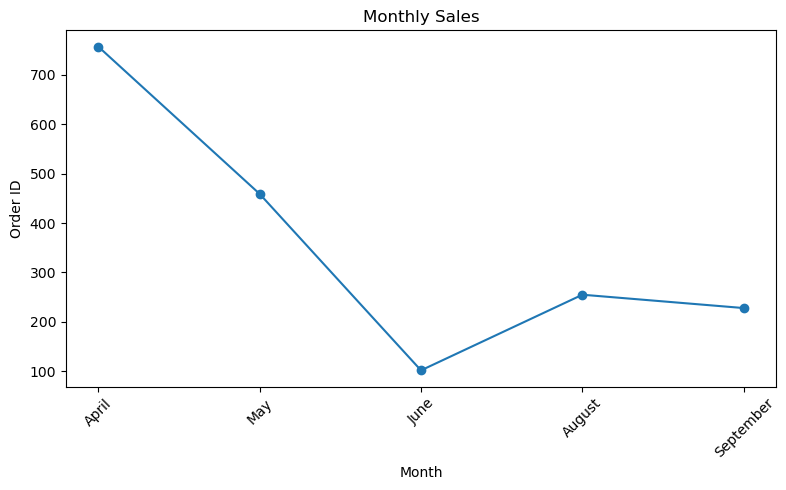

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Number of Orders'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Order ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Total sales over time (grouped by day)
sales_over_time = all_data.groupby(all_data['Sent Date'].dt.date).size().reset_index(name='Order Count')

print(sales_over_time)

      Sent Date  Order Count
0    2024-04-13         1961
1    2024-04-14         2053
2    2024-04-15         1864
3    2024-04-16         1717
4    2024-04-17         1775
..          ...          ...
131  2024-09-26         1239
132  2024-09-27         1161
133  2024-09-28         1726
134  2024-09-29         1643
135  2024-09-30         2143

[136 rows x 2 columns]


In [13]:
# Group by hour and count orders
hourly_orders = all_data.groupby('Hour')['Order #'].count().reset_index()
hourly_orders.columns = ['Hour', 'Order Count']

print(hourly_orders)

    Hour  Order Count
0    0.0            7
1    7.0            8
2    9.0           35
3   10.0          228
4   11.0        16493
5   12.0        26159
6   13.0        22011
7   14.0        18105
8   15.0        16331
9   16.0        14784
10  17.0        18691
11  18.0        23673
12  19.0        27002
13  20.0        17764
14  21.0         4778
15  22.0          606


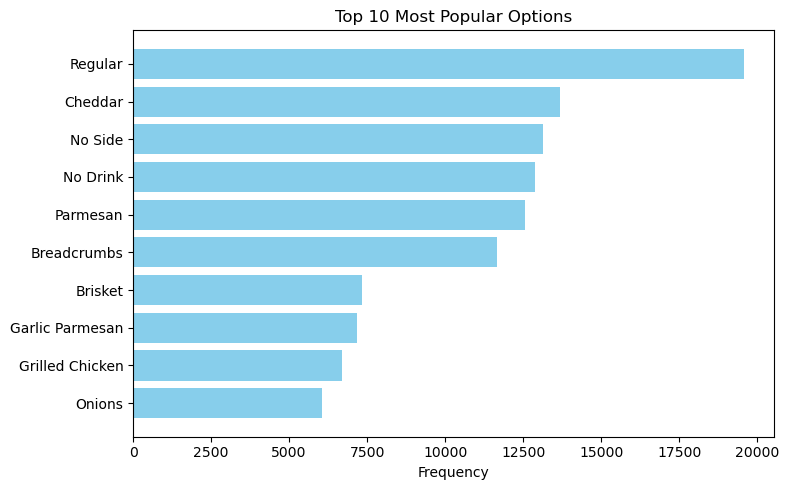

In [14]:
plt.figure(figsize=(8, 5))
plt.barh(top_10_modifiers['Modifier'][::-1], top_10_modifiers['Frequency'][::-1], color='skyblue')
plt.title('Top 10 Most Popular Options')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

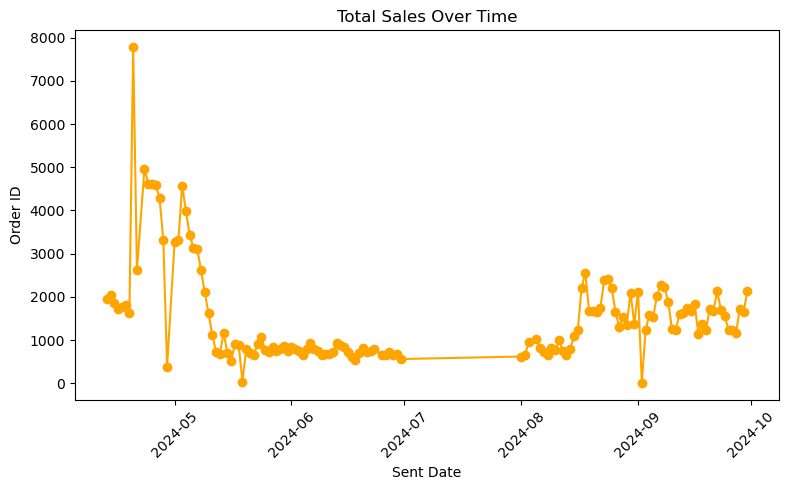

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(sales_over_time['Sent Date'], sales_over_time['Order Count'], marker='o', color='orange')
plt.title('Total Sales Over Time')
plt.xlabel('Sent Date')
plt.ylabel('Order ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

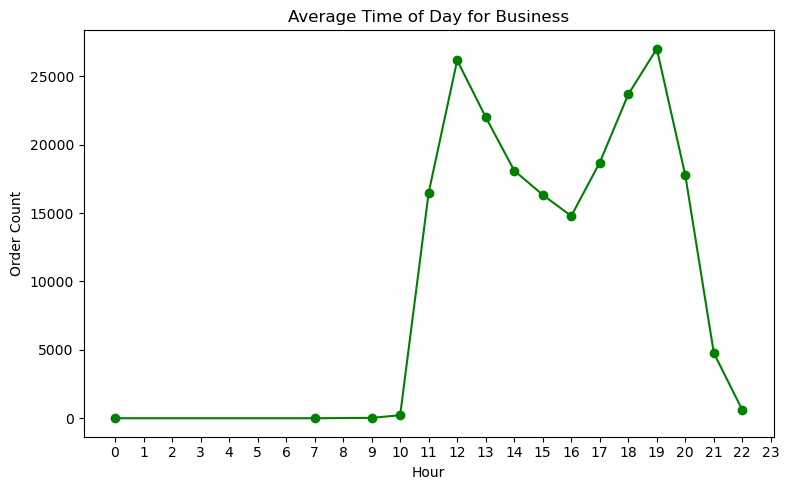

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(hourly_orders['Hour'], hourly_orders['Order Count'], marker='o', color='green')
plt.title('Average Time of Day for Business')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()